<a href="https://colab.research.google.com/github/vipin-jangra/machine_leaning/blob/main/svm_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
from sklearn.datasets import load_iris
df = load_iris()

In [70]:
data = pd.DataFrame(df.data)
data.columns = df.feature_names
data['target'] = df.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [71]:
#using sepal features
X_sepal = data.iloc[:,[0,1]].values
y_sepal = data.iloc[:,4].values

#using petal features
X_petal = data.iloc[:,[2,3]].values
y_petal = data.iloc[:,4].values

In [72]:
#train test split the data with both the features
from sklearn.model_selection import train_test_split

#spliting sepal features data
X_train_sepal,X_test_sepal,y_train_sepal,y_test_sepal = train_test_split(X_sepal, y_sepal, test_size=0.3, random_state=0)

#splittinig petal features data
X_train_petal,X_test_petal,y_train_petal,y_test_petal = train_test_split(X_petal, y_petal, test_size=0.3, random_state=0)

In [73]:
# SVM regularixarion parameter
C = 1.0

In [74]:
#import svm model
from sklearn import svm

models = (
    svm.SVC(kernel='linear', C=C),
    svm.SVC(kernel='sigmoid',C=C),
    svm.SVC(kernel='rbf', gamma=0.7, C=C),
    svm.SVC(kernel='poly', degree = 3, gamma ='auto', C=C),
)

In [75]:
#fitting the data in models
models_sepal = (mod.fit(X_train_sepal, y_train_sepal) for mod in models)

models_petal = (mod.fit(X_train_petal, y_train_petal) for mod in models)

In [76]:
# title for the plots
titles = (
    "SVC with linear kernel",
    "SVC with sigmoid kernel",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

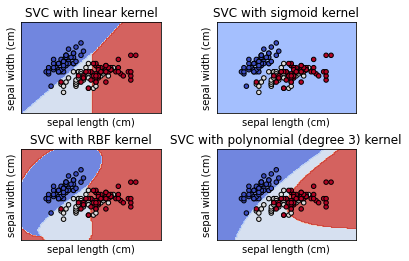

In [77]:
#importing decision boundary display
from sklearn.inspection import DecisionBoundaryDisplay

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

#visualizing sepal
X0, X1 = X_sepal[:, 0], X_sepal[:, 1]

for clf, title, ax in zip(models_sepal, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_sepal,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=df.feature_names[0],
        ylabel=df.feature_names[1],
    )
    ax.scatter(X0, X1, c=y_sepal, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [86]:
# calculating accuracy for sepal features
from sklearn.metrics import accuracy_score 

models_sepal_predict = (mod.predict(X_test_sepal) for mod in models)

for msp,title in zip(models_sepal_predict,titles):
  accuracy = accuracy_score(y_test_sepal,msp)*100
  print(title+" accuracy : "+str(accuracy))

SVC with linear kernel accuracy : 24.444444444444443
SVC with sigmoid kernel accuracy : 11.11111111111111
SVC with RBF kernel accuracy : 24.444444444444443
SVC with polynomial (degree 3) kernel accuracy : 24.444444444444443


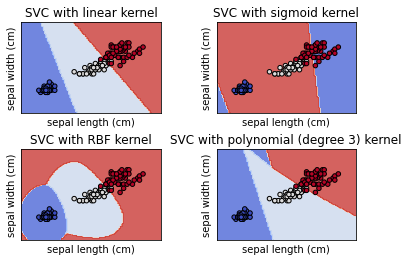

In [79]:
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

#visualizing petal
X0, X1 = X_petal[:, 0], X_petal[:, 1]

for clf, title, ax in zip(models_petal, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_petal,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=df.feature_names[0],
        ylabel=df.feature_names[1],
    )
    ax.scatter(X0, X1, c=y_petal, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()


In [87]:
#calculating accuracy for petal features
models_petal_predict = (mod.predict(X_test_petal) for mod in models)
for msp,title in zip(models_petal_predict,titles):
  accuracy = accuracy_score(y_test_petal,msp)*100
  print(title+" accuracy : "+str(accuracy))

SVC with linear kernel accuracy : 97.77777777777777
SVC with sigmoid kernel accuracy : 11.11111111111111
SVC with RBF kernel accuracy : 97.77777777777777
SVC with polynomial (degree 3) kernel accuracy : 97.77777777777777
